In [6]:
from pdf2image import convert_from_path, convert_from_bytes
import torch
from functools import partial
from PIL import Image
from transformers import Pix2StructForConditionalGeneration as psg
from transformers import Pix2StructProcessor as psp

In [7]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = psg.from_pretrained("google/pix2struct-docvqa-base").to(DEVICE) 
processor = psp.from_pretrained("google/pix2struct-docvqa-base")

#to-be/Pix2StructGhega
# google textcaps-base or ocrvqa-base docvqa-base

In [8]:
#docvqa
def generate(model, processor, img, questions):
  inputs = processor(images=[img for _ in range(len(questions))], 
           text=questions, return_tensors="pt").to(DEVICE)
  predictions = model.generate(**inputs, max_new_tokens=512)
  return zip(questions, processor.batch_decode(predictions, skip_special_tokens=True))

#doc parsing
# def generate(model, processor, img):
#   inputs = processor(images=[img], return_tensors="pt").to(DEVICE)
#   predictions = model.generate(**inputs, max_new_tokens=512)
#   return processor.batch_decode(predictions, skip_special_tokens=True)


# def convert_pdf_to_image(filename, page_no):
#     return convert_from_path(filename)[page_no-1]

In [9]:
invoice_questions = ["what is the invoice number?",
             "what is the date of issue?",
             "What is the Grand total?",
             "What is the subtotal or nett amount?",
             "What is the GST amount?"]

statement_questions = ["what is the second invoice number?",
             "what is the date of issue?",
             "What is company?",
             "What is the total balance?",
             "What is the document type"]

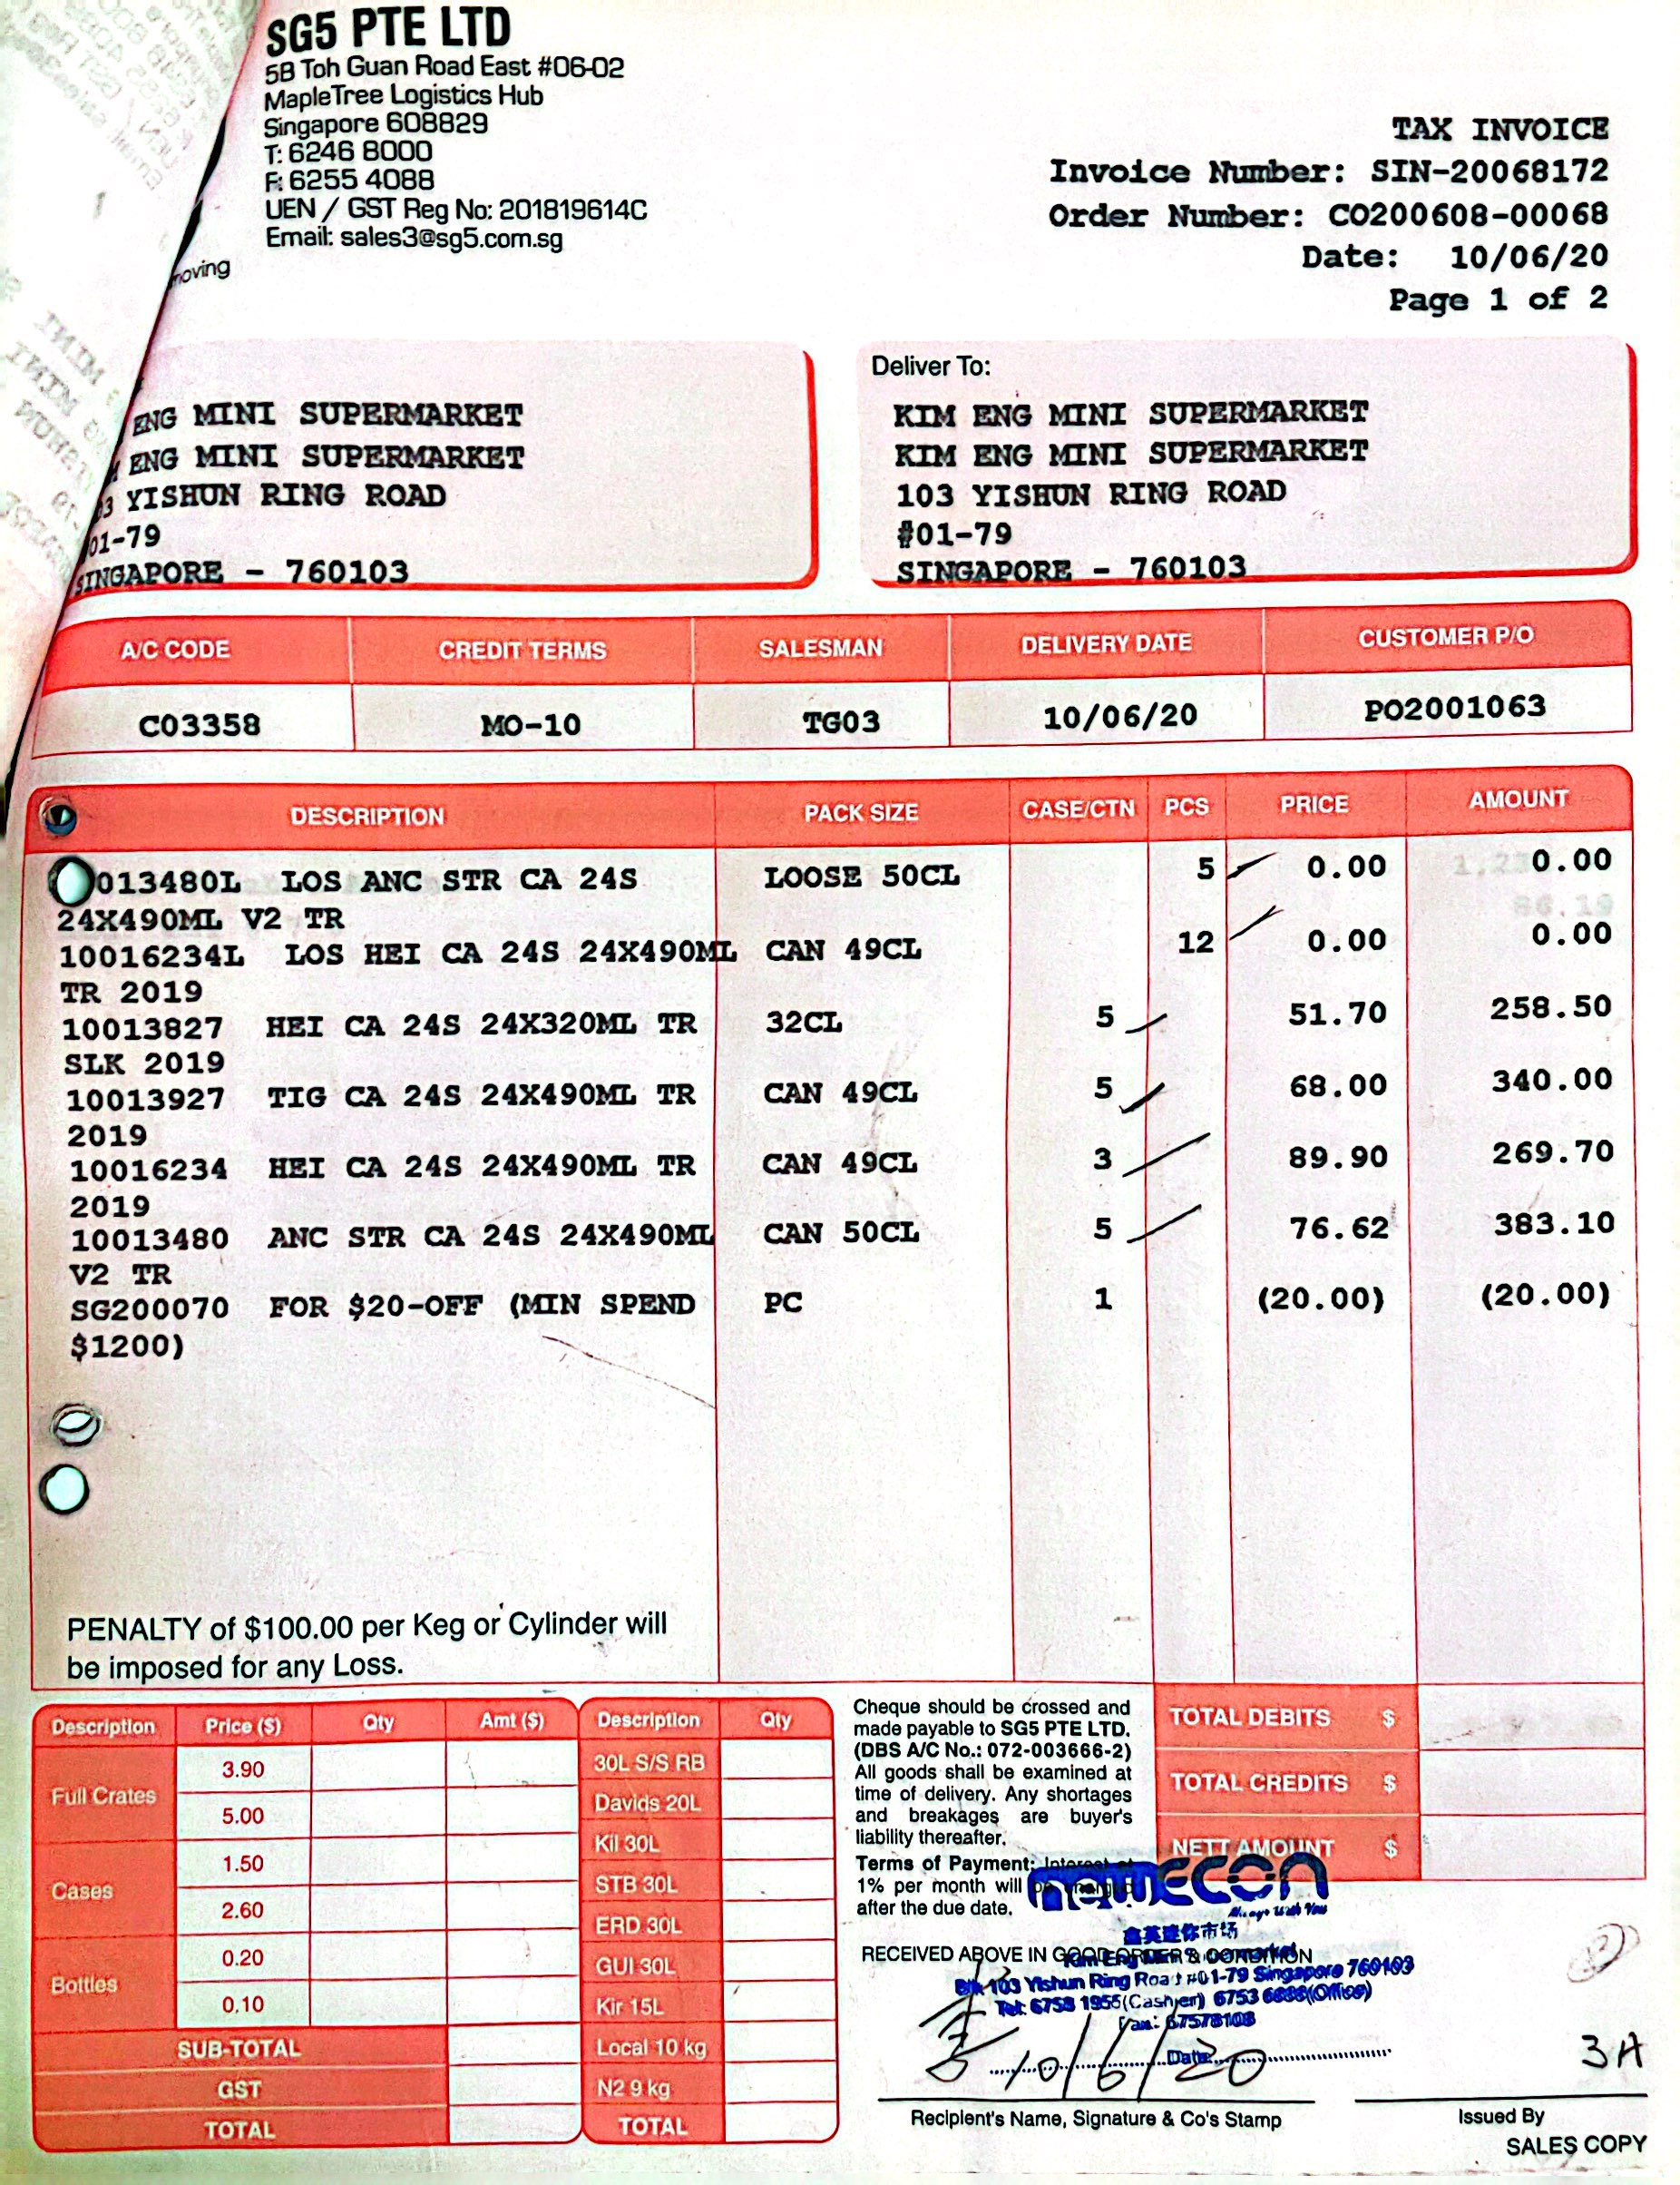

<s_DocType> datasheet</s_DocType><s_Model> GL480/GL480Q/GL483Q</s_Model><s_Voltage> 6 I</s_Voltage><s_StorageTemperature> -4(Jt0 85</s_StorageTemperature>


In [14]:
#FILENAME = "TMC5160.pdf"
# image = convert_pdf_to_image(FILENAME, PAGE_NO)
img_path = "../data/Invoice/CamScanner 06-20-2023 11.20_.jpg"
# img_path = "../data/Invoice/R-4-8.jpg"
image = Image.open(img_path).convert("RGB")
display(image)
# print("pdf to image conversion complete.")
generator = partial(generate, model, processor)
completions = generator(image,invoice_questions)
for completion in completions:
    print(f"{completion}")  